     gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none          72             72         

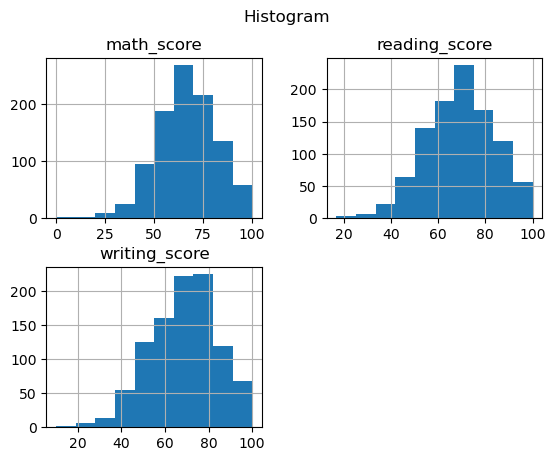

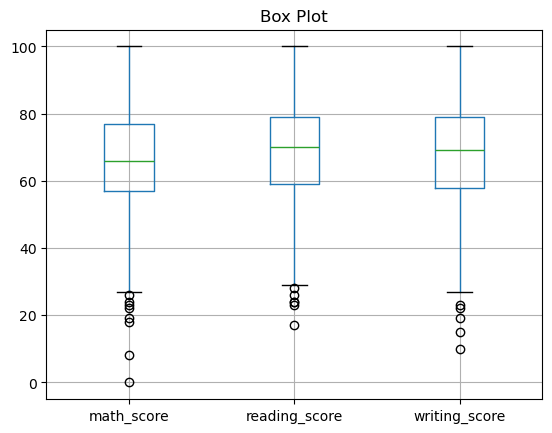

                math_score  reading_score  writing_score
prep_completed                                          
No               69.695531      73.893855      74.418994
Yes              64.077882      66.534268      64.504673


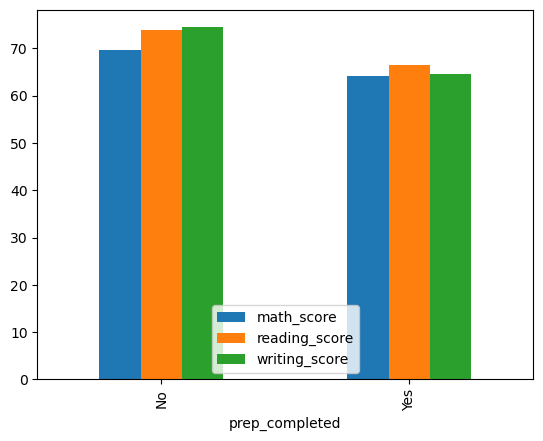

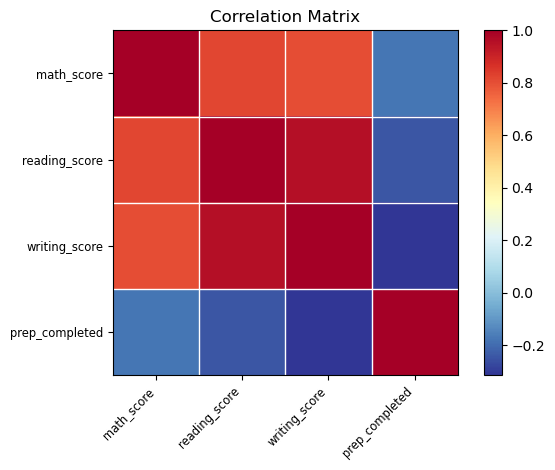

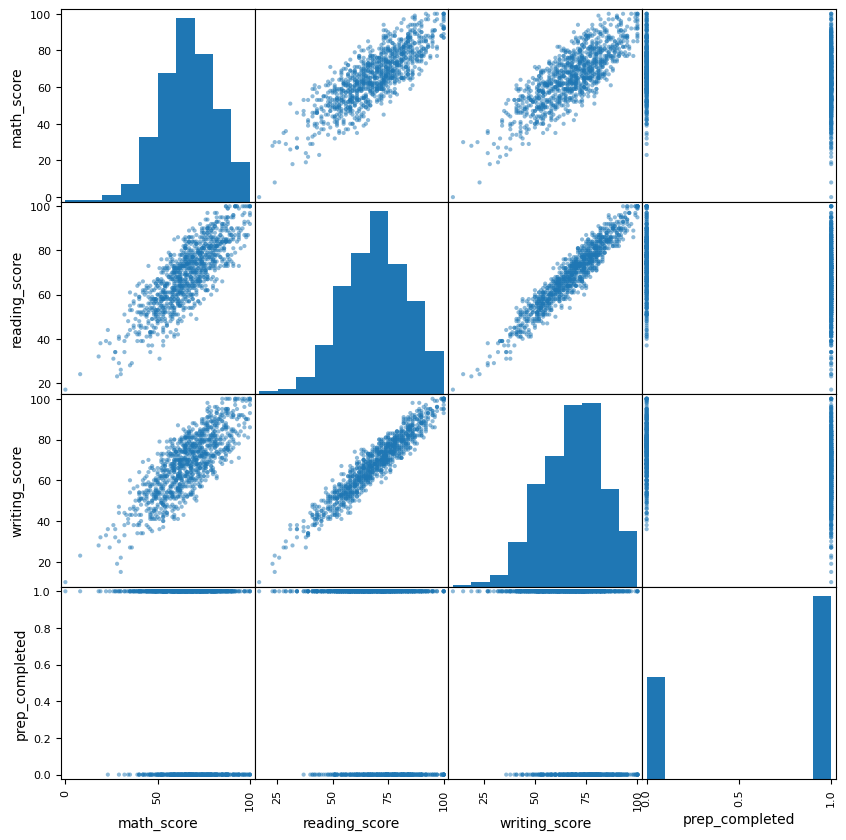

In [74]:
#Explorary data Analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import statsmodels.api as sm

df = pd.read_csv('C:/Users/Admin/Documents/StudentsPerformance.csv')
print(data)
df.columns = df.columns.str.replace(' ', '_')

df.test_preparation_course = preprocessing.LabelBinarizer().fit_transform(df.test_preparation_course)
df = pd.DataFrame(np.c_[df.math_score, df.reading_score, df.writing_score, df.test_preparation_course], 
                  columns=['math_score', 'reading_score', 'writing_score' ,'prep_completed'])
df.prep_completed = np.where(df.prep_completed==0, 'No', 'Yes')

print(df.describe())
df.hist()
plt.suptitle('Histogram')
plt.show()

df.boxplot()
plt.title('Box Plot')
plt.show()

print(df.groupby('prep_completed').mean())
df.groupby('prep_completed').mean().plot(kind='bar')

df.prep_completed = np.where(df.prep_completed=='No', 0, 1)
df = df[['math_score', 'reading_score', 'writing_score', 'prep_completed']]
corr = df.corr()
sm.graphics.plot_corr(corr, xnames=list(corr))
plt.show()

scatter_matrix(df, figsize=(10, 10))
plt.show()

     gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none          72             72         

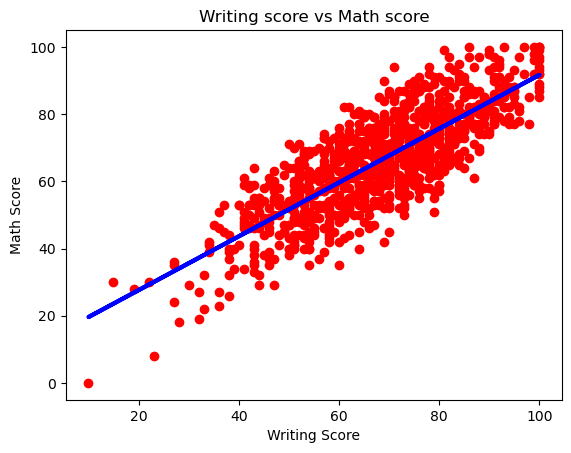

R-Squared for Degree 0 : 0.6442342539264934
R-Squared for Degree 1 : 0.6449012554903882
R-Squared for Degree 2 : 0.6473058350757452
R-Squared for Degree 3 : 0.647414610321448
R-Squared for Degree 4 : 0.6474146232787389
R-Squared for Degree 5 : 0.6474166448695664


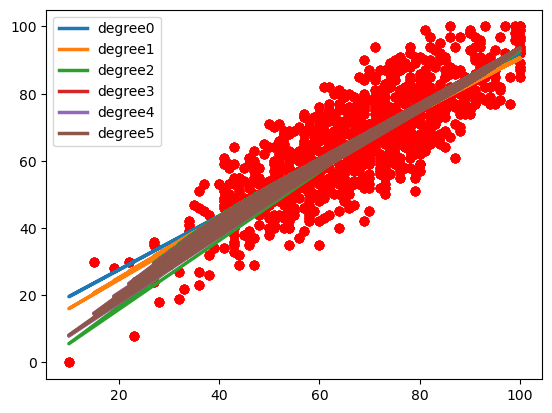

R-Squared for Degree 3  0.647414610321448


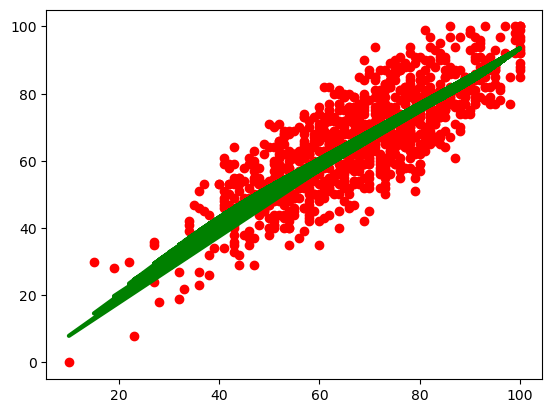

In [112]:
#Supervised Learning -Regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

df = pd.read_csv('C:/Users/Admin/Documents/StudentsPerformance.csv')
print(df)
df.columns = df.columns.str.replace(' ', '_')

x = df['writing_score'].values[:, np.newaxis]
y = df['math_score'].values

#Linear-Regression
model = lm.LinearRegression()
model.fit(x, y)

#Model-Evaluation
print('R-Squared: ', metrics.r2_score(y, model.predict(x)))
print('MAE: ', metrics.mean_absolute_error(y, model.predict(x)))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y, model.predict(x))))

#Visualization
plt.scatter(x, y, color='red')
plt.plot(x, model.predict(x), color='blue', linewidth=3)
plt.title('Writing score vs Math score')
plt.xlabel('Writing Score')
plt.ylabel('Math Score')
plt.show()

#Checking the best degree for Non-linear Regression
lr = lm.LinearRegression()

degrees = 6

for degree in range(degrees):
    model = make_pipeline(PolynomialFeatures(degree+1), lr)
    model.fit(x, y)
    print(f'R-Squared for Degree {degree} : {metrics.r2_score(y, model.predict(x))}')
    plt.scatter(x, y, color='red')
    plt.plot(x, model.predict(x), linewidth=2.5, label='degree'+str(degree))
    plt.legend()
plt.show()

#No Significant increase after R-squared for 4- So the best degree is 3
model = make_pipeline(PolynomialFeatures(4), lr)
model.fit(x, y)

print('R-Squared for Degree 3 ',metrics.r2_score(y, model.predict(x)))

plt.scatter(x, y, color='red')
plt.plot(x, model.predict(x), color='green', linewidth=3)